# Using Cellular Communication Sensing to Support Early Recovery from

Alcohol Use Disorder

Kendra Wyant [](https://orcid.org/0000-0002-0767-7589) (Department of Psychology, University of Wisconsin-Madison)  
Coco Yu [](https://orcid.org/0000-0002-7731-0563) (Department of Psychology, University of Wisconsin-Madison)  
John J. Curtin [](https://orcid.org/0000-0002-3286-938X) (Department of Psychology, University of Wisconsin-Madison)  
October 4, 2025

In [ ]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

# Introduction

One of the biggest challenges in Alcohol Use Disorders (AUD) treatment stems from the chronic relapsing nature of this disease ([Scott et al., 2005](#ref-scottPathwaysRelapseTreatment2005)). People can relapse days, weeks, and even years after obtaining the goal of abstinence. At least 60% of AUD patients relapse to heavy drinking within 6 months following treatment ([Kirshenbaum et al., 2009](#ref-kirshenbaumQuantitativeReviewUbiquitous2009); [Nguyen et al., 2020](#ref-nguyenPredictingRelapseAlcohol2020a); [Witkiewitz, 2011](#ref-witkiewitzPredictorsHeavyDrinking2011a)). At most 50% of people with an AUD achieve remission after several years ([Fleury et al., 2016](#ref-fleuryRemissionSubstanceUse2016); [Heyman, 2013](#ref-heymanQuittingDrugsQuantitative2013)).

Identifying initial lapses in early recovery is critical. Lapses – single episodes of alcohol use – are easy to define, have a clear onset, and are also clinically meaningful. They serve as an early warning sign of returning back to previous drinking behavior inconsistent with desired goals ([Chung & Maisto, 2006](#ref-chungRelapseAlcoholOther2006a); [Marlatt & Donovan, 2005](#ref-marlattRelapsePreventionMaintenance2005a); [Witkiewitz & Marlatt, 2004](#ref-witkiewitzRelapsePreventionAlcohol2004a)). Lapse predicts future lapses, with more frequent ones resulting in increased risks of relapse ([Högström Brandt et al., 1999](#ref-hogstrombrandtPredictionSingleEpisodes1999a); [Witkiewitz & Marlatt, 2004](#ref-witkiewitzRelapsePreventionAlcohol2004a)).

Current predictions of alcohol lapses rely heavily on self reports, which can be burdensome to measure in long run. Machine learning models leveraging ecological momentary assessment (EMA) measures have performed relatively well to predict goal-inconsistent alcohol use ([Wyant et al., 2024](#ref-wyantMachineLearningModels2024)). The surveys were collected up to four times daily for three months. However, constantly completing surveys makes it burdensome for AUD patients. Although most EMA relevant mental health research demonstrated modest compliance rates, their time windows last from two weeks to three months ([Czyz et al., 2018](#ref-czyzEcologicalAssessmentDaily2018); [Hung et al., 2016](#ref-hungSmartphonebasedEcologicalMomentary2016); [Mackesy-Amiti & Boodram, 2018](#ref-mackesy-amitiFeasibilityEcologicalMomentary2018); [Porras-Segovia et al., 2020](#ref-porras-segoviaSmartphonebasedEcologicalMomentary2020); [van Genugten et al., 2020](#ref-vangenugtenExperiencedBurdenAdherence2020)). The study length is insufficient because AUD is a chronic disease that requires constant risk monitoring. As extended period of time is anticipated, users’ perceived burden of answering surveys is presumably larger ([Mogk et al., 2023](#ref-mogkImplementationWorkflowStrategies2023)). Although minimizing the number of items in the surveys and the frequency of prompting users to complete the surveys might help mitigate the associated burden, it can inevitably reduce the prediction precision and temporal precision of predictions.

Passive cellular communication sensing represents new opportunities due to its feasibility, relatively low burden on individuals and continuous data collection. In a smartphone-based sensing platform the primary expense on the individual is the smartphone. Smartphone usage is already widespread. Eighty-five percent of US adults have a smartphone and this number is consistent across all sociodemographic groups, including those in recovery programs for substance use ([Center, 2021](#ref-pewresearchcenterMobileFactSheet2021a); [Masson et al., 2019](#ref-massonHealthrelatedInternetUse2019a)). Studies collecting passive data have demonstrated high acceptability from participants and higher compliance rates compared to active measures ([Beukenhorst et al., 2022](#ref-beukenhorstUsingSmartphonesReduce2022a); [Wyant et al., 2023](#ref-wyantAcceptabilityPersonalSensing2023a)). Further, risk monitoring using cellular sensing is temporally sensitive to fluctuating risks. Analyzing communication patterns can detect potential triggers in time without actively prompting users to reflect on their feelings at the moment or report their environment.

Cellular communications, with minimal contextual information, is embedded with potentially rich information that align with relapse antecedents. For example, social interactions can have important influences on drinking behavior ([Alvarez et al., 2021](#ref-alvarezSocialNetworkHeavy2021a); [Hunter-Reel et al., 2009](#ref-hunter-reelEmphasizingInterpersonalFactors2009a)). We may be able to capture immediate risk based on who someone is calling or what time of day it is. Decreased interactions may signify isolation common with depressive symptoms, reaching out to people in one’s social network could signify a positive coping strategy, or changes in patterns between a single person in one’s social network could indicate conflict ([Chih et al., 2014](#ref-chihPredictiveModelingAddiction2014a); [Hufford et al., 2003](#ref-huffordRelapseNonlinearDynamic2003a); [Miller et al., 2001](#ref-millerHowEffectiveAlcoholism2001a)).

This study aims at building machine learning models from cellular communications that identify *who* are at heightened risk for alcohol lapses, *when* they will lapse, and *why* they are at increased risk.

# Methods

## Participants and Procedure

We recruited adults in early recovery from AUD in Madison, Wisconsin, through print and digital advertisements and partnerships with treatment centers. Eligibility criteria required that participants were age 18 or older, able to read and write in English, had moderate to severe AUD [1], had been abstinent from alcohol for 1–8 weeks, were willing to use a single smartphone, and were not exhibiting severe psychosis or paranoia.[2]

Participants completed up to 5 study visits over approximately 3 months: a screening visit, intake visit, and 3 monthly follow-up visits. At screening we collected demographic information (age, sex at birth, race, ethnicity, education, marital status, employment, and income) and clinical characteristics (DSM-5 AUD symptom count, alcohol problems ([Hurlbut & Sher, 1992](#ref-hurlbutAssessingAlcoholProblems1992)), and presence of psychological symptoms ([Derogatis, L.R., 2000](#ref-derogatislBriefSymptomInventory))). At intake we collected additional self-report data on abstinence self-efficacy ([McKiernan et al., 2011](#ref-mckiernanDevelopmentBriefAbstinence2011)), craving ([Flannery et al., 1999](#ref-flanneryPsychometricPropertiesPenn1999)), and recent recovery efforts. At each monthly follow-up, we downloaded cellular communication metadata (voice calls and SMS text message logs) from participants’ smartphones. We identified important contacts (i.e., individuals they had communicated with at least twice by call or text in the past month) and asked 7 contextual questions about these contacts.

While enrolled, participants completed 4 brief daily ecological momentary assessments (7-10 questions). The first item assessed alcohol use (date and time of any unreported drinking episodes). Lapse reports were verified at follow-up visits using a timeline follow-back interview. Additional sensing data streams and self-report measures were collected for the parent grant. The full study protocol is available on our Open Science Framework page (<https://osf.io/wgpz9/>).

We screened 192 participants. Of these, 169 enrolled and 154 completed the first follow-up. Data from 10 participants were excluded due to loss of abstinence goals, careless responding, or unusually low compliance. The final analytic sample included 144 participants.

## Data Analysis Plan

Our models predicted the probability of an alcohol lapse within a 24-hour window. Predictions were generated daily at 4 a.m., beginning on participants’ second study day and continuing for up to 3 months. In total, there were 11,507 labeled prediction windows across all participants.

Features were engineered from all available data up to the start of each window.[3] The full model included 406 features from cellular communication data plus 24 features from baseline self-report measures. We also evaluated a comparison model that used only the baseline features. <a href="#tbl-1" class="quarto-xref">Table 1</a> details the raw predictors and feature engineering procedures.

Candidate model configurations differed by algorithm (elastic net, random forest, XGBoost), outcome resampling method, and hyperparemter values. The best configuration for each model was selected using 6 repeats of participant-grouped 5-fold cross-validation. Our performance metric was area under the receiver operating curve (auROC). Folds were stratified by a between-subject measure of our outcome (low lapsers: 0-9 lapses; high lapsers: 10+ lapses).

We evaluated model performance with a Bayesian hierarchical generalized linear model. Posterior distributions with 95% credible intervals (CIs) were estimated from the 30 held-out test sets using weakly informative, data-dependent priors to regularize and reduce overfitting.[4] Random intercepts were included for repeat and fold (nested within repeat). auROCs were logit-transformed and regressed on model type to estimate the probability that model performances differed systematically.

Our best performing models used an elastic net algorithm. We quantified feature importance by examining the retained features (i.e., coefficient value \> 0) in the full model and ordering them by absolute coefficient value. These values provide an estimate of the direction and magnitude of association between each predictor and the outcome, conditional on the other features retained. All our annotated analysis scripts are publicly available on our study website (<https://jjcurtin.github.io/study_messages/>).

``` python
feats |> 
  knitr::kable() |> 
  kable_classic() 
```

| Raw Predictor | Response Options | Feature Engineering | Scoring Epochs | Total Features | Full Model | Baseline Model |
|:---|:---|:---|:---|---:|:---|:---|
| Originated | Incoming, outgoing | Difference and raw rate counts for text messages and voice calls | 6, 12, 24, 48, 72, and 168 hours | 48 | Yes | No |
| Call duration | Duration (in minutes) | Difference and raw rate sums of duration, difference and raw most recent duration | 6, 12, 24, 48, 72, and 168 hours | 14 | Yes | No |
| Call answered | Yes, no | Difference and raw rate counts for unanswered incoming voice calls | 6, 12, 24, 48, 72, and 168 hours | 12 | Yes | No |
| Date/time of communication | Date and time | Difference and raw rate counts for text messages and voice calls at night (10 pm – 6am) and on weekends | 24, 48, 72, and 168 hours (night), 168 hours (weekend) | 20 | Yes | No |
| Phone number | Phone number | Difference and raw rate counts of unique phone numbers | 6, 12, 24, 48, 72, and 168 hours | 12 | Yes | No |
| Type of Relationship | Family, friend, counselor or social worker, co-worker | Difference and raw rate counts of unique phone numbers | 6, 12, 24, 48, 72, and 168 hours | 48 | Yes | No |
| Have you drank alcohol with this person? | Never/almost never, occasionally, almost always/always | Difference and raw rate counts of each response option | 6, 12, 24, 48, 72, and 168 hours | 36 | Yes | No |
| What is their drinking status? | Drinker, non-drinker, don’t know | Difference and raw rate counts of each response option | 6, 12, 24, 48, 72, and 168 hours | 36 | Yes | No |
| Would you expect them to drink in your presence? | Yes, no, uncertain | Difference and raw rate counts of each response option | 6, 12, 24, 48, 72, and 168 hours | 36 | Yes | No |
| Are they currently in recovery from drugs or alcohol? | Yes, no, don’t know | Difference and raw rate counts of each response option | 6, 12, 24, 48, 72, and 168 hours | 36 | Yes | No |
| Are they supportive about your recovery goals? | Supportive, unsupportive, mixed, neutral, don’t know | Difference and raw rate counts of each response option | 6, 12, 24, 48, 72, and 168 hours | 60 | Yes | No |
| How are your typical experiences with this person? | Pleasant, unpleasant, mixed, neutral | Difference and raw rate counts of each response option | 6, 12, 24, 48, 72, and 168 hours | 48 | Yes | No |
| DSM-5 symptom count | Numeric (4-11) |  |  | 1 | Yes | Yes |
| Past year alcohol problems | Numeric (0-27) |  |  | 1 | Yes | Yes |
| Craving | Numeric (0-30) |  |  | 1 | Yes | Yes |
| Abstinence self-efficacy: Negative affect, social, physical, and craving subscales | Numeric (0-20) |  |  | 4 | Yes | Yes |
| Number of individual alcohol counseling sessions attended (past 30 days) | Numeric |  |  | 1 | Yes | Yes |
| Number of group alcohol counseling sessions attended (past 30 days) | Numeric |  |  | 1 | Yes | Yes |
| Number of self-help group meetings attended (past 30 days) | Numeric |  |  | 1 | Yes | Yes |
| Number of other mental health counseling sessions attended (past 30 days) | Numeric |  |  | 1 | Yes | Yes |
| Number of days in contact with supportive people (past 30 days) | Numeric |  |  | 1 | Yes | Yes |
| Number of days in contact with unsupportive people (past 30 days) | Numeric |  |  | 1 | Yes | Yes |
| Taken prescribed medication for alcohol use disorder (past 30 days) | Yes, no | Dummy coded |  | 1 | Yes | Yes |
| Taken prescribed medication for other mental health disorder (past 30 days) | Yes, no | Dummy coded |  | 1 | Yes | Yes |
| Satisfaction with progress toward recovery goals (past 30 days) | Numeric (0-4) |  |  | 1 | Yes | Yes |
| Confidence in abstinence ability (next 30 days) | Numeric (0-4) |  |  | 1 | Yes | Yes |
| Has a goal of abstinence | Yes, no, uncertain | Dummy coded |  | 2 | Yes | Yes |
| Age | Numeric (years) |  |  | 1 | Yes | Yes |
| Sex at birth | Male, female | Dummy coded |  | 1 | Yes | Yes |
| Race | Non-Hispanic White, non-White and/or Hispanic | Dummy coded |  | 1 | Yes | Yes |
| Education | High school or less, some college, college degree | Dummy coded |  | 2 | Yes | Yes |
| Income | Numeric (dollars) |  |  | 1 | Yes | Yes |
| Marital Status | Married, not married, other | Dummy coded |  | 2 | Yes | Yes |

Table 1: Feature Engineering of Raw Predictors

## Ethical Considerations

All procedures were approved by the University of Wisconsin-Madison Institutional Review Board (Study #2015-0780). All participants provided written informed consent.

# Results

## Participants

<a href="#tbl-2" class="quarto-xref">Table 2</a> provides the demographic characterization of our sample. We obtained a total of 375,912 contextualized communications across participants. Participants had, on average, 2,610 communications (range = 109-14,225). 56% of participants reported at least one lapse.

``` python
footnote_table_dem_a <- "N = 144"


table_dem |> 
  knitr::kable() |> 
  kable_classic() |> 
  kableExtra::group_rows(start_row = 3, end_row = 4) |> 
  kableExtra::group_rows(start_row = 6, end_row = 10) |> 
  kableExtra::group_rows(start_row = 12, end_row = 13) |> 
  kableExtra::group_rows(start_row = 15, end_row = 20) |> 
  kableExtra::group_rows(start_row = 22, end_row = 30) |> 
  kableExtra::group_rows(start_row = 33, end_row = 37) |> 
  kableExtra::footnote(general = c(footnote_table_dem_a), escape=FALSE)
```

|  | N | % | M | SD | Range |
|:---|---:|---:|:---|:---|:---|
| Age |  |  | 40.4 | 11.8 | 21-72 |
| Sex at Birth |  |  |  |  |  |
|  |  |  |  |  |  |
| Female | 74 | 51.4 |  |  |  |
| Male | 70 | 48.6 |  |  |  |
| Race |  |  |  |  |  |
|  |  |  |  |  |  |
| American Indian/Alaska Native | 3 | 2.1 |  |  |  |
| Asian | 2 | 1.4 |  |  |  |
| Black/African American | 8 | 5.6 |  |  |  |
| White/Caucasian | 125 | 86.8 |  |  |  |
| Other/Multiracial | 6 | 4.2 |  |  |  |
| Hispanic, Latino, or Spanish origin |  |  |  |  |  |
|  |  |  |  |  |  |
| Yes | 3 | 2.1 |  |  |  |
| No | 141 | 97.9 |  |  |  |
| Education |  |  |  |  |  |
|  |  |  |  |  |  |
| Less than high school or GED degree | 1 | 0.7 |  |  |  |
| High school or GED | 14 | 9.7 |  |  |  |
| Some college | 39 | 27.1 |  |  |  |
| 2-Year degree | 13 | 9.0 |  |  |  |
| College degree | 55 | 38.2 |  |  |  |
| Advanced degree | 22 | 15.3 |  |  |  |
| Employment |  |  |  |  |  |
|  |  |  |  |  |  |
| Employed full-time | 70 | 48.6 |  |  |  |
| Employed part-time | 25 | 17.4 |  |  |  |
| Full-time student | 7 | 4.9 |  |  |  |
| Homemaker | 1 | 0.7 |  |  |  |
| Disabled | 7 | 4.9 |  |  |  |
| Retired | 8 | 5.6 |  |  |  |
| Unemployed | 15 | 10.4 |  |  |  |
| Temporarily laid off, sick leave, or maternity leave | 3 | 2.1 |  |  |  |
| Other, not otherwise specified | 8 | 5.6 |  |  |  |
| Personal Income |  |  | \$35,050 | \$32,069 | \$0-200,000 |
| Marital Status |  |  |  |  |  |
|  |  |  |  |  |  |
| Never married | 63 | 43.8 |  |  |  |
| Married | 32 | 22.2 |  |  |  |
| Divorced | 42 | 29.2 |  |  |  |
| Separated | 5 | 3.5 |  |  |  |
| Widowed | 2 | 1.4 |  |  |  |
| <span style="font-style: italic;">Note: </span> |  |  |  |  |  |
|  N = 144 |  |  |  |  |  |

Table 2: Demographics

## Model Evaluation

The median posterior probability for auROC for the full model was 0.68. The 95% CIs were relatively narrow (\[0.64, 0.71\]) and did not contain .5, providing strong evidence that the model is capturing signal in the data. The final model retained 13 features (<a href="#fig-1" class="quarto-xref">Figure 1</a>). The top four features were baseline measures of abstinence confidence, having a goal of abstinence, abstinence self-efficacy when experiencing negative affect, and craving. Communication frequency with people who don’t know about the individual’s recovery goals also appeared to be an important feature for increasing lapse risk.

[1] (≥4 self-reported DSM-5 symptoms)

[2] Defined as scores \>2.2 or 2.8, respectively, on the psychosis or paranoia scales of the Symptom Checklist–90 ([Derogatis, L.R., 2000](#ref-derogatislBriefSymptomInventory)).

[3] We filtered the data to include only communications with known context prior to feature engineering.

[4] Residual SD ~ normal(0, exp(2)); intercept (centered predictors) ~ normal(2.3, 1.3); window-width contrasts ~ normal(0, 2.69); covariance ~ decov(1,1,1,1).

``` python
feat_imp 
```

<figure id="fig-1">
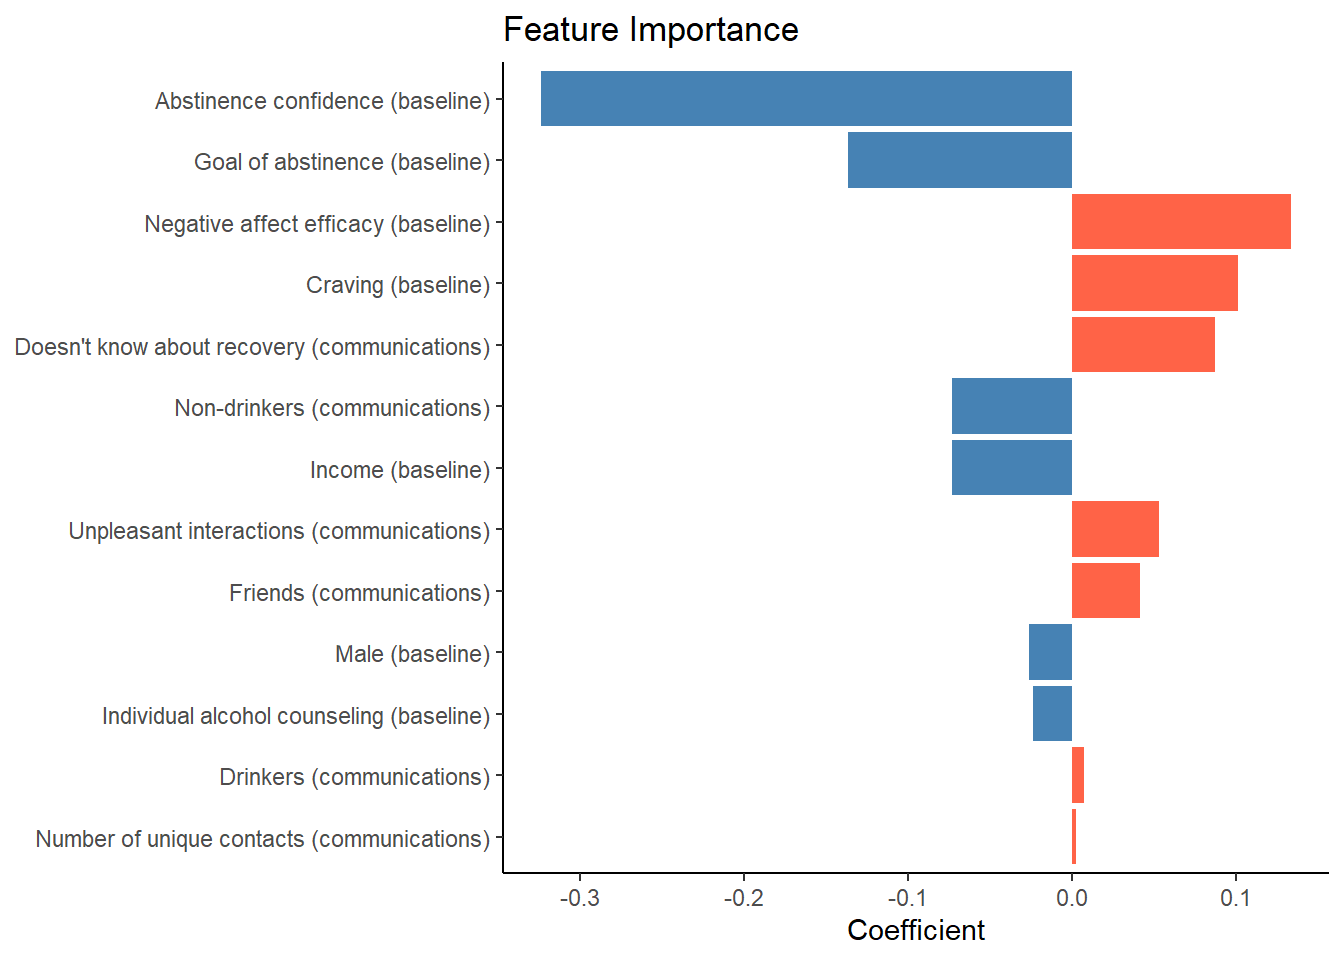
<figcaption>Figure 1: Global feature importance (elastic net coefficient) for the full model. Features are ordered by absolute coefficient value. Blue bars indicate higher feature values, on average, lower lapse risk. Red bars indicate higher feature values, on average, increase risk. Baseline features were collected from self-report measures at the start of the study. Communication features were engineered from the contexualized cellular communications.</figcaption>
</figure>

## Model Comparison

We evaluated a comparison model to determine the extent that cellular communications were adding predictive value above and beyond the baseline features. The baseline model retained 5 features and obtained performance nearly identical to the full model (median auROC 0.68, 95% CIs \[0.64, 0.71\]). There was a median difference in auROC of the full and baseline models of less than .01, yielding no evidence (52% probability) that the posterior distributions were meaningfully different.

# Discussion

Alvarez, M. J., Richards, D. K., Oviedo Ramirez, S., & Field, C. A. (2021). Social network heavy drinking moderates the effects of a brief motivational intervention for alcohol use among injured patients. *Addictive Behaviors*, *112*, 106594. <https://doi.org/10.1016/j.addbeh.2020.106594>

Beukenhorst, A. L., Burke, K. M., Scheier, Z., Miller, T. M., Paganoni, S., Keegan, M., Collins, E., Connaghan, K. P., Tay, A., Chan, J., Berry, J. D., & Onnela, J.-P. (2022). Using smartphones to reduce research burden in a neurodegenerative population and assessing participant adherence: A randomized clinical trial and two observational studies. *JMIR Mhealth and Uhealth*, *10*(2), e31877. <https://doi.org/10.2196/31877>

Center, P. R. (2021). *Mobile Fact Sheet*. Pew Research Center.

Chih, M.-Y., Patton, T., McTavish, F. M., Isham, A. J., Judkins-Fisher, C. L., Atwood, A. K., & Gustafson, D. H. (2014). Predictive modeling of addiction lapses in a mobile health application. *Journal of Substance Abuse Treatment*, *46*(1), 29–35. <https://doi.org/10.1016/j.jsat.2013.08.004>

Chung, T., & Maisto, S. A. (2006). Relapse to alcohol and other drug use in treated adolescents: Review and reconsideration of relapse as a change point in clinical course. *Clinical Psychology Review*, *26*(2), 149–161. <https://doi.org/10.1016/j.cpr.2005.11.004>

Czyz, E. K., King, C. A., & Nahum-Shani, I. (2018). Ecological assessment of daily suicidal thoughts and attempts among suicidal teens after psychiatric hospitalization: Lessons about feasibility and acceptability. *Psychiatry Research*, *267*, 566–574. <https://doi.org/10.1016/j.psychres.2018.06.031>

Derogatis, L.R. (2000). *Brief Symptom Inventory 18 - Administration, scoring, and procedures manual*. NCS Pearson.

Flannery, B. A., Volpicelli, J. R., & Pettinati, H. M. (1999). [Psychometric properties of the Penn Alcohol Craving Scale](https://www.ncbi.nlm.nih.gov/pubmed/10470970). *Alcoholism, Clinical and Experimental Research*, *23*(8), 1289–1295.

Fleury, M.-J., Djouini, A., Huỳnh, C., Tremblay, J., Ferland, F., Ménard, J.-M., & Belleville, G. (2016). Remission from substance use disorders: A systematic review and meta-analysis. *Drug and Alcohol Dependence*, *168*, 293–306. <https://doi.org/10.1016/j.drugalcdep.2016.08.625>

Heyman, G. M. (2013). Quitting Drugs: Quantitative and Qualitative Features. *Annual Review of Clinical Psychology*, *9*(Volume 9, 2013), 29–59. <https://doi.org/10.1146/annurev-clinpsy-032511-143041>

Högström Brandt, A. M., Thorburn, D., Hiltunen, A. J., & Borg, S. (1999). Prediction of single episodes of drinking during the treatment of alcohol-dependent patients. *Alcohol (Fayetteville, N.Y.)*, *18*(1), 35–42. <https://doi.org/10.1016/s0741-8329(98)00065-2>

Hufford, M. R., Witkiewitz, K., Shields, A. L., Kodya, S., & Caruso, J. C. (2003). Relapse as a nonlinear dynamic system: Application to patients with alcohol use disorders. *Journal of Abnormal Psychology*, *112*(2), 219–227. <https://doi.org/10.1037/0021-843X.112.2.219>

Hung, S., Li, M.-S., Chen, Y.-L., Chiang, J.-H., Chen, Y.-Y., & Hung, G. C.-L. (2016). Smartphone-based ecological momentary assessment for Chinese patients with depression: An exploratory study in Taiwan. *Asian Journal of Psychiatry*, *23*, 131–136. <https://doi.org/10.1016/j.ajp.2016.08.003>

Hunter-Reel, D., McCrady, B., & Hildebrandt, T. (2009). Emphasizing interpersonal factors: An extension of the Witkiewitz and Marlatt relapse model. *Addiction (Abingdon, England)*, *104*(8), 1281–1290. <https://doi.org/10.1111/j.1360-0443.2009.02611.x>

Hurlbut, S. C., & Sher, K. J. (1992). Assessing alcohol problems in college students. *Journal of American College Health.*, *41*(2), 49–58.

Kirshenbaum, A. P., Olsen, D. M., & Bickel, W. K. (2009). A quantitative review of the ubiquitous relapse curve. *Journal of Substance Abuse Treatment*, *36*(1), 8–17. <https://doi.org/10.1016/j.jsat.2008.04.001>

Mackesy-Amiti, M. E., & Boodram, B. (2018). Feasibility of ecological momentary assessment to study mood and risk behavior among young people who inject drugs. *Drug and Alcohol Dependence*, *187*, 227–235. <https://doi.org/10.1016/j.drugalcdep.2018.03.016>

Marlatt, G. A., & Donovan, D. M. (Eds.). (2005). *Relapse prevention: Maintenance strategies in the treatment of addictive behaviors, 2nd ed* (pp. xiv, 416). The Guilford Press.

Masson, C. L., Chen, I. Q., Levine, J. A., Shopshire, M. S., & Sorensen, J. L. (2019). Health-related internet use among opioid treatment patients. *Addictive Behaviors Reports*, *9*, 100157. <https://doi.org/10.1016/j.abrep.2018.100157>

McKiernan, P., Cloud, R., Patterson, D. A., Wolf, S., Golder, S., & Besel, K. (2011). Development of a Brief Abstinence Self-Efficacy Measure. *Journal of Social Work Practice in the Addictions*, *11*(3), 245–253. <https://doi.org/10.1080/1533256X.2011.593445>

Miller, W. R., Walters, S. T., & Bennett, M. E. (2001). How effective is alcoholism treatment in the United States? *Journal of Studies on Alcohol*, *62*(2), 211–220. <https://doi.org/10.15288/jsa.2001.62.211>

Mogk, J. M., Matson, T. E., Caldeiro, R. M., Garza Mcwethy, A. M., Beatty, T., Sevey, B. C., Hsu, C. W., & Glass, J. E. (2023). Implementation and workflow strategies for integrating digital therapeutics for alcohol use disorders into primary care: A qualitative study. *Addiction Science & Clinical Practice*, *18*(1). <https://doi.org/10.1186/s13722-023-00387-w>

Nguyen, L.-C., Durazzo, T. C., Dwyer, C. L., Rauch, A. A., Humphreys, K., Williams, L. M., & Padula, C. B. (2020). Predicting Relapse After Alcohol Use Disorder Treatment in a High-Risk Cohort: The Roles of Anhedonia and Smoking. *Journal of Psychiatric Research*, *126*, 1–7. <https://doi.org/10.1016/j.jpsychires.2020.04.003>

Porras-Segovia, A., Molina-Madueño, R. M., Berrouiguet, S., López-Castroman, J., Barrigón, M. L., Pérez-Rodríguez, M. S., Marco, J. H., Díaz-Oliván, I., de León, S., Courtet, P., Artés-Rodríguez, A., & Baca-García, E. (2020). Smartphone-based ecological momentary assessment (EMA) in psychiatric patients and student controls: A real-world feasibility study. *Journal of Affective Disorders*, *274*, 733–741. <https://doi.org/10.1016/j.jad.2020.05.067>

Scott, C. K., Foss, M. A., & Dennis, M. L. (2005). Pathways in the relapse–treatment–recovery cycle over 3 years. *Journal of Substance Abuse Treatment*, *28 Suppl 1*, S63–72. <https://doi.org/10.1016/j.jsat.2004.09.006>

van Genugten, C. R., Schuurmans, J., Lamers, F., Riese, H., Penninx, B. W. J. H., Schoevers, R. A., Riper, H. M., & Smit, J. H. (2020). Experienced Burden of and Adherence to Smartphone-Based Ecological Momentary Assessment in Persons with Affective Disorders. *Journal of Clinical Medicine*, *9*(2), 322. <https://doi.org/10.3390/jcm9020322>

Witkiewitz, K. (2011). Predictors of Heavy Drinking During and Following Treatment. *Psychology of Addictive Behaviors : Journal of the Society of Psychologists in Addictive Behaviors*, *25*(3), 426–438. <https://doi.org/10.1037/a0022889>

Witkiewitz, K., & Marlatt, G. A. (2004). Relapse prevention for alcohol and drug problems: That was Zen, this is Tao. *The American Psychologist*, *59*(4), 224–235. <https://doi.org/10.1037/0003-066X.59.4.224>

Wyant, K., Moshontz, H., Ward, S. B., Fronk, G. E., & Curtin, J. J. (2023). Acceptability of Personal Sensing Among People With Alcohol Use Disorder: Observational Study. *JMIR mHealth and uHealth*, *11*, e41833. <https://doi.org/10.2196/41833>

Wyant, K., Sant’Ana, S. J., Fronk, G. E., & Curtin, J. J. (2024). Machine learning models for temporally precise lapse prediction in alcohol use disorder. *Journal of Psychopathology and Clinical Science*, *133*(7), 527–540. <https://doi.org/10.1037/abn0000901>